## Google Location

This code will parse your Google Location export data, create a CSV, and do some simple data checks and data analysis. 

Enjoy! 

#### First, we need to convert Location History.json to CSV

In [1]:
import generate
generate

Reading location history JSON file...
Loading JSON internally...
Creating your CSV file...
10% completed
20% completed
30% completed
40% completed
50% completed
60% completed
70% completed
80% completed
90% completed
Done!


<module 'generate' from '/Users/brycedewitt/Documents/qs_ledger/Google Location/generate.py'>

#### Additional packages
If you run into import issues with the packages on the rows below, uncomment these lines and try to import them to the current kernel. 

In [2]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install descartes
# !{sys.executable} -m pip install geopandas
# !{sys.executable} -m pip install shapely
# !{sys.executable} -m pip install matplotlib


In [3]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import glob
import csv
import matplotlib.pyplot as plt
import sys
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

#### Data exploration

First, lets take a look through the better-formatted CSV to see what things look like.  Load your CSV:

In [4]:
data = pd.read_csv("data/out.csv", quoting=3, delimiter=',', skiprows=1, names=["timestamp", "longitudeE7", "latitudeE7", "accuracy", "altitude", "verticalAccuracy", "velocity"], dtype={'longitudeE7': np.float64, 'latitudeE7': np.float64 , 'accuracy':'Int64'})

 Lets take a look first at just how many rows of data points we have:

In [5]:
data.size

5312636

Next, we'll see what the first recorded values in the document are:

In [6]:
data.head()

,timestamp,longitudeE7,latitudeE7,accuracy,altitude,verticalAccuracy,velocity
0,2011-11-24 17:55:30.239000,-120.843097,35.364554,2795,-1,-1,-1
1,2011-11-24 18:56:37.265000,-120.843097,35.364554,2795,-1,-1,-1
2,2011-11-24 18:56:37.699000,-120.843097,35.364554,2795,-1,-1,-1
3,2011-11-24 18:56:39.487000,-120.833702,35.341048,2704,-1,-1,-1
4,2011-11-24 18:57:40.581000,-120.739505,35.329383,2429,-1,-1,-1


... and of course, lets take a look at what the most recent data points are:

In [7]:
data.tail()

,timestamp,longitudeE7,latitudeE7,accuracy,altitude,verticalAccuracy,velocity
758943,2020-01-13 14:27:24.443000,-71.087485,42.338264,65,9,10,-1
758944,2020-01-13 14:40:35.139000,-71.087675,42.338887,10,0,16,2
758945,2020-01-13 16:31:44.447000,-71.087837,42.339914,10,8,16,0
758946,2020-01-13 16:34:08,-71.106052,42.347102,2500,-1,-1,-1
758947,2020-01-17 01:54:24.159000,-71.087512,42.343032,65,9,10,-1


#### Diving a little deeper
Lets try visualizing all your 2019 datapoints.  First, we'll import a map of the USA we can use to 

In [8]:
street_map = gpd.read_file('./usa/cb_2018_us_ua10_500k.shp')

In [9]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
start_date = '01-01-2019'
end_date = '01-01-2020'
mask = (data['timestamp'] > start_date) & (data['timestamp'] <= end_date)
data_2019 = data.loc[mask]
gdf = gpd.GeoDataFrame(
    data_2019, geometry=gpd.points_from_xy(data_2019['longitudeE7'], data_2019['latitudeE7']))
gdf.head()

,timestamp,longitudeE7,latitudeE7,accuracy,altitude,verticalAccuracy,velocity,geometry
735215,2019-01-01 00:32:37.543,-119.847168,39.350814,5,1846,6,0,POINT (-119.84717 39.35081)
735216,2019-01-01 00:34:54.999,-119.846975,39.350969,10,1846,8,1,POINT (-119.84698 39.35097)
735217,2019-01-01 00:52:03.999,-119.846948,39.350750,10,1848,16,0,POINT (-119.84695 39.35075)
735218,2019-01-01 00:55:44.999,-119.846973,39.350885,5,1852,6,0,POINT (-119.84697 39.35088)
735219,2019-01-01 01:08:13.000,-119.846933,39.350894,10,1847,8,0,POINT (-119.84693 39.35089)


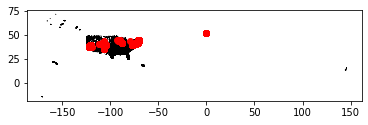

In [10]:
ax = street_map.plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()